## prepare the needed data

In [1]:
# loading the original dataset

import json
    
## read the json file
f = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Previous code\\\\APFAProject-master\\\\APFA_software\\\\data\\\\TVs-all-merged.json')
data_original = json.load(f)

# total product count
product_count = 0
for id in data_original.keys():
    product_count += len(data_original[id])
    
product_count*(product_count-1)


2635752

In [2]:
## read the json file
import json
a = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 4\\\\amazon.json')
amazon_data = json.load(a)

b = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 4\\\\bestbuy.json')
bestbuy_data = json.load(b)

c = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 4\\\\newegg.json')
newegg_data = json.load(c)

d = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 4\\\\thenerds.json')
thenerds_data = json.load(d)

store_data = {'amazon.com':amazon_data,'bestbuy.com':bestbuy_data,'newegg.com':newegg_data,'thenerds.net':thenerds_data}


In [3]:
# The aligned key sheet and the key information sheet
import json
    
## read the json file
f = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 3\\\\matched_mape.json')
aligned_sheet = json.load(f)


## read the json file
f = open('C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Algorithm 2\\\\shop_dict_A2.json')
dict_shop = json.load(f)



## Define the needed function 

In [4]:
# partial duplicates count 
def dup_count(dataset):
    id_list = []
    for shop in dataset.values():
        for id in shop.keys():
            id_list.append(id)
            
    # calculate the amount of id in the given dataset (A)                
    id_count = len(set(id_list))
    
    # calculate the amount of id that only occur once in the given dataset (non-duplicate product) (B)
    non_dup = []
    occurence_count = dict((i, id_list.count(i)) for i in id_list)
    for id in occurence_count.keys():
        if occurence_count[id] == 1:
            non_dup.append(id)
            
        else: pass
    
    # A-B would be the found duplicate in the give dataset
    non_dup_count = len(non_dup)
    duplicates_count = id_count - non_dup_count
    return(duplicates_count)
            

In [5]:
# In this section we will select the aligned key between given shop

def align_key_set(shop1,shop2,standard):
    pairkey_shop1 = list(aligned_sheet[shop1].keys())
    pairkey_shop2 = list(aligned_sheet[shop2].keys())
    
    for key in aligned_sheet[shop1].keys():
        matched_key = aligned_sheet[shop1][key][shop2]
        if matched_key['score'] < standard:
            pairkey_shop1.remove(key)
            
            
    for key in aligned_sheet[shop2].keys():
        matched_key = aligned_sheet[shop2][key][shop1]
        if matched_key['score'] < standard:
            pairkey_shop2.remove(key)
    
    return(pairkey_shop1,pairkey_shop2)

In [6]:
# in this function we will find the matched key across shops

def matched_key(shop1,shop2,key1):
    key2 = aligned_sheet[shop1][key1][shop2]['key']
    score = aligned_sheet[shop1][key1][shop2]['score']
    return(key2,score)

In [7]:
# value similarity --- string (Qgram)


from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance

def qgram_similarity(string1,string2,q=3):
    if len(string1) >= q and len(string2) >= q :
        similarity = 1-jaccard_distance(set(ngrams(string1, q)), set(ngrams(string2, q)))
        return(similarity)
    elif len(string1) >= 0 and len(string2) >= 0 : 
        similarity = 1-jaccard_distance(set(list(string1)), set(list(string2)))
        return(similarity)
    else: return(0)

In [8]:
# value similarity --- double

from scipy import stats

def double_similarity(double_key1,double_key2,key1_Dimension,key2_Dimension):
    global AllowedDifference
    global position
    position = 0
    AllowedDifference = 0.18
    if key1_Dimension == key2_Dimension:
    #dimension are same
        if key1_Dimension > 1:
            P_similarity = []
            # return the double camparing for each dimension
            while position < key1_Dimension:
                #creat the parameter 
                number_1 = double_key1[position]
                number_2 = double_key2[position]
                if abs(number_1 - number_2)<= AllowedDifference:
                    P_similarity.append(1)
                else:    
                    P_similarity.append(0)
                position += 1
            
            result = sum(P_similarity) / len(P_similarity)
            return(result)
        
        
        
        elif key1_Dimension == 1:
            # hence we only have one dimension, we just need to return whether they're conditionally same
            number_1 = double_key1[position]
            number_2 = double_key2[position]
            if abs(number_1 - number_2)<= AllowedDifference:
                return 1
            else:    
                return 0
        else: return(0)
    
    else:      
    #dimension are different
        return(0) 


In [9]:
# figure out the similarity mape and detect the duplicate product in each store
def Similarity(data):
    from collections import defaultdict
    import re

    
    executed_comparisons = 0
    value_weight = 0.11
    standard = 0.11
    title_weight = 1-value_weight

    overall_similarity = defaultdict(lambda:None)

    for shop in data.keys():
        similarity = defaultdict(lambda:None)

        for product_1 in data[shop].values():
            similarity[product_1['model_ID']] = defaultdict(lambda:0)

            # if the compared product are different brands, we treat them as different product, therefore we define similarity as 0 
            for matched_product_2 in product_1['matched product']:
                similarity[product_1['model_ID']][matched_product_2['title']] = defaultdict(lambda:0)
                
                product_1_id = product_1['model_ID']
                product_2_id = matched_product_2['ID']
                product_2_title = matched_product_2['title']
                product_2_shop = matched_product_2['shop']
                keys_shop1,keys_shop2 = align_key_set(shop,product_2_shop,standard)
                
                if product_2_id in data[product_2_shop].keys():
                    executed_comparisons +=1
                    if data[shop][product_1_id]['brand'] != data[product_2_shop][product_2_id]['brand']:
                        similarity[product_1_id][product_2_title] = product_2_id
                    else:
                        # here we check if the product keys belongs to the aligned key set
                        matched_key1 = []
                        matched_key2 = []
                        unmatched_key1 = []
                        unmatched_key2 = []
                        for key_1 in data[shop][product_1_id]['featuresMap'].keys():
                            if key_1 in keys_shop1:
                                matched_key1.append(key_1)
                            else:
                                unmatched_key1.append(key_1)

                        for key_2 in data[product_2_shop][product_2_id]['featuresMap'].keys():
                            if key_2 in keys_shop2:
                                matched_key2.append(key_2)
                            else:
                                unmatched_key2.append(key_2)

                        # now we calculate the similarity of each key
                        for key_1 in matched_key1:
                            similarity[product_1_id][product_2_title]['keyscore'] = {}
                            similarity[product_1_id][product_2_title]['keyscore']['finalscore'] = 0
                            key_count = 0
                            key_2,key_weight = matched_key(shop,product_2_shop,key_1)


                            if key_2 in matched_key2:
                                key_count +=1
                                if dict_shop[shop][key_1]['keytype'] == 'string':
                                    similarity[product_1_id][product_2_title]['keyscore'][key_1] = key_weight * qgram_similarity(data[shop][product_1_id]['featuresMap'][key_1],
                                                                                                      data[product_2_shop][product_2_id]['featuresMap'][key_2],3)
                                    similarity[product_1_id][product_2_title]['keyscore']['finalscore'] += key_weight * qgram_similarity(data[shop][product_1_id]['featuresMap'][key_1],
                                                                                                      data[product_2_shop][product_2_id]['featuresMap'][key_2],3)
                                    # Question: in original code they have a 'stringcomparing' function to define whethere they compare the string score or just compare if they are same or not
                                    # but I don't know why we need that.

                                elif dict_shop[shop][key_1]['keytype'] == 'double':

                                    value_1 = data[shop][product_1_id]['featuresMap'][key_1]
                                    numbers_1 = [float(s) for s in re.findall(r'\d+\.\d+|\d+', value_1)]
                                    dim_1 = len(numbers_1)


                                    value_2 = data[product_2_shop][product_2_id]['featuresMap'][key_2]
                                    numbers_2 = [float(s) for s in re.findall(r'\d+\.\d+|\d+', value_2)]
                                    dim_2 = len(numbers_2)
                                    similarity[product_1_id][product_2_title]['keyscore'][key_1] = key_weight*double_similarity(numbers_1,numbers_2,dim_1,dim_2)
                                    similarity[product_1_id][product_2_title]['keyscore']['finalscore'] += key_weight*double_similarity(numbers_1,numbers_2,dim_1,dim_2)


                            else:
                                unmatched_key1.append(key_1)

                        if key_count != 0:

                            similarity[product_1_id][product_2_title]['keyscore']['finalscore'] = similarity[product_1_id][product_2_title]['keyscore']['finalscore'] / key_count
                            # here we calculate the title similarity
                            similarity[product_1_id][product_2_title]['title similarity'] = qgram_similarity(data[shop][product_1_id]['Title'],
                                                                                                       data[product_2_shop][product_2_id]['Title'],3)


                            similarity[product_1_id][product_2_title]['final similarity'] = value_weight*similarity[product_1_id][product_2_title]['keyscore']['finalscore'] + title_weight*similarity[product_1_id][product_2_title]['title similarity']
                            similarity[product_1_id][product_2_title]['ID'] = product_2_id
                            similarity[product_1_id][product_2_title]['shop'] = product_2_shop



                        else: 
                            similarity[product_1_id][product_2_title]['keyscore']['finalscore'] = 0
                            # here we calculate the title similarity
                            similarity[product_1_id][product_2_title]['title similarity'] = qgram_similarity(data[shop][product_1_id]['Title'],
                                                                                                       data[product_2_shop][product_2_id]['Title'],3)


                            similarity[product_1_id][product_2_title]['final similarity'] = value_weight*similarity[product_1_id][product_2_title]['keyscore']['finalscore'] + title_weight*similarity[product_1_id][product_2_title]['title similarity']
                            similarity[product_1_id][product_2_title]['ID'] = product_2_id
                            similarity[product_1_id][product_2_title]['shop'] = product_2_shop

            else: pass
        overall_similarity[shop] = similarity           
        
    
    
    # tidy up the output dictionary
    output_similarity = {}
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for shop in overall_similarity.keys():
        output_similarity[shop] = {}
        
        for product in overall_similarity[shop].keys():
            output_similarity[shop][product] = {'amazon.com':{}, 'bestbuy.com':{}, 'newegg.com':{}, 'thenerds.net':{}}
            max_score = defaultdict(lambda:0)
            for matched_product in overall_similarity[shop][product].keys():
                if type(overall_similarity[shop][product][matched_product]) == str:
                    if product == overall_similarity[shop][product][matched_product]:
                        FN += 1
                    elif product != overall_similarity[shop][product][matched_product]:
                        TN += 1
                        
                    pass
                
                else:
                    matched_product_shop = overall_similarity[shop][product][matched_product]['shop']
                    if overall_similarity[shop][product][matched_product]['final similarity'] > max_score[matched_product_shop]:
                        output_similarity[shop][product][matched_product_shop] = {matched_product:overall_similarity[shop][product][matched_product]}
                        max_score[matched_product_shop] = overall_similarity[shop][product][matched_product]['final similarity']
                    elif product != overall_similarity[shop][product][matched_product]['ID']:
                        TN += 1
                    elif product == overall_similarity[shop][product][matched_product]['ID']:
                        FN += 1
                        
            for shop_recheck in output_similarity[shop][product].keys():
                for obj in output_similarity[shop][product][shop_recheck].values():
                    if  product == obj['ID']:
                        TP +=1
                    else: FP +=1
    
    
    try:
        Precision = TP/(TP+FP)
        Recall = TP/(TP+FN)
        F_measure = 2*Precision*Recall/(Precision+Recall)
    except:
        Precision = 0
        Recall = 0
        F_measure = 0
    return(output_similarity,executed_comparisons,Precision,Recall,F_measure)


In [10]:
# find the match for specific product id
def find_match(data,shop,model_id):
    similarity_set = Similarity(data)
    output_set = similarity_set[shop][model_id]
    return(output_set)
    

In [11]:
# check the result of the entity resolution

def result_check(similarity):
    correct = 0
    correct_id = []
    for shop in similarity.values():
        for id in shop.keys():
            for rest_shop in shop[id].keys():
                for matched_product in shop[id][rest_shop].values():
                    matched_id = matched_product['ID']
                    if id == matched_id:
                        if id in correct_id:
                            pass
                        else:
                            correct +=1
                            correct_id.append(id)
                    
    return(correct,correct_id)


In [12]:
configuration = [['t_mw2','d_skip','union'],['t_mw3','d_skip','union'],['t_mw4','d_skip','union'],
                 ['t_mw2','d_skip','conjunction'],['t_mw3','d_skip','conjunction'],['t_mw4','d_skip','conjunction'],
                 ['t_mw2','d_suffix','union'],['t_mw3','d_suffix','union'],['t_mw4','d_suffix','union'],
                 ['t_mw2','d_suffix','conjunction'],['t_mw3','d_suffix','conjunction'],['t_mw4','d_suffix','conjunction'],
                 ['t_mw2','d_qgram','union'],['t_mw3','d_qgram','union'],['t_mw4','d_qgram','union'],
                 ['t_mw2','d_qgram','conjunction'],['t_mw3','d_qgram','conjunction'],['t_mw4','d_qgram','conjunction'],
                 ['t_mw2','d_mw','union'],['t_mw3','d_mw','union'],['t_mw4','d_mw','union'],
                 ['t_mw2','d_mw','conjunction'],['t_mw3','d_mw','conjunction'],['t_mw4','d_mw','conjunction'],
                 ['t_mw2','d_wo','union'],['t_mw3','d_wo','union'],['t_mw4','d_wo','union'],
                 ['t_mw2','d_wo','conjunction'],['t_mw3','d_wo','conjunction'],['t_mw4','d_wo','conjunction'],
                 ['t_wo2','d_skip','union'],['t_wo3','d_skip','union'],['t_wo4','d_skip','union'],
                 ['t_wo2','d_skip','conjunction'],['t_wo3','d_skip','conjunction'],['t_wo4','d_skip','conjunction'],
                 ['t_wo2','d_suffix','union'],['t_wo3','d_suffix','union'],['t_wo4','d_suffix','union'],
                 ['t_wo2','d_suffix','conjunction'],['t_wo3','d_suffix','conjunction'],['t_wo4','d_suffix','conjunction'],
                 ['t_wo2','d_qgram','union'],['t_wo3','d_qgram','union'],['t_wo4','d_qgram','union'],
                 ['t_wo2','d_qgram','conjunction'],['t_wo3','d_qgram','conjunction'],['t_wo4','d_qgram','conjunction'],
                 ['t_wo2','d_mw','union'],['t_wo3','d_mw','union'],['t_wo4','d_mw','union'],
                 ['t_wo2','d_mw','conjunction'],['t_wo3','d_mw','conjunction'],['t_wo4','d_mw','conjunction'],
                 ['t_wo2','d_wo','union'],['t_wo3','d_wo','union'],['t_wo4','d_wo','union'],
                 ['t_wo2','d_wo','conjunction'],['t_wo3','d_wo','conjunction'],['t_wo4','d_wo','conjunction'],
                 ['t_qgram','d_wo','union'],['t_qgram','d_wo','conjunction'],
                 ['t_qgram','d_mw','union'],['t_qgram','d_mw','conjunction'],
                 ['t_suffix','d_wo','union'],['t_suffix','d_wo','conjunction'],
                 ['t_suffix','d_mw','union'],['t_suffix','d_mw','conjunction'],
                 ['t_skip','d_wo','union'],['t_skip','d_wo','conjunction'],
                 ['t_skip','d_mw','union'],['t_skip','d_mw','conjunction']]


selected_configurations = [['t_mw3','d_wo','conjunction'],['t_wo4','d_mw','conjunction'],['t_mw2','d_mw','conjunction'],['t_wo4','d_suffix','conjunction'],
                           ['t_wo2','d_mw','conjunction'],['t_mw2','d_suffix','conjunction'],['t_wo3','d_skip','conjunction'],['t_wo3','d_suffix','conjunction'],
                           ['t_wo4','d_wo','conjunction'],['t_wo4','d_qgram','union'],['t_wo3','d_qgram','union']]



In [121]:
## read the data set after the preselection of blocking schema

import json
output = {}
total_compare = 0
for shop in data_set.values():
    total_compare += (product_count - len(shop.keys()))* len(shop.keys())

for i in configuration:
    if i[2] == 'union':
        name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_union.json'
        a = open(name)
        data_set = json.load(a)
        conf_name = i[0] + '_'+i[1]+'_union'
    elif i[2]=='conjunction':
        name = 'C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_conjunction.json'
        b = open(name)
        data_set = json.load(b)
        conf_name =  i[0] + '_'+i[1]+'_conjunction'
    
    result,executed_comparisons,Precision,Recall,F_measure = Similarity(data_set)

    PQ = pairs_quality(result,executed_comparisons)
    PC = pairs_completeness(data_set,result)
    RR = reduction_rate(total_compare,executed_comparisons)
    output[conf_name] = {'PQ':str(PQ),'PC':str(PC),'RR':str(RR),'Precision':Precision,'Recall':Recall,'F_measure':F_measure}

    

In [58]:
## Now we evaluat the performance of selected configurations

import json

for i in selected_configurations:
    if i[2] == 'union':
        name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_union.json'
        a = open(name)
        data_set = json.load(a)
        conf_name = i[0] + '_'+i[1]+'_union'
    elif i[2]=='conjunction':
        name = 'C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_conjunction.json'
        b = open(name)
        data_set = json.load(b)
        conf_name =  i[0] + '_'+i[1]+'_conjunction'
    
    result,executed_comparisons,Precision,Recall,F_measure = Similarity(data_set)

    output[conf_name] = {'Precision':Precision,'Recall':Recall,'F_measure':F_measure}
    


In [69]:
PQ = pairs_quality(t_mw3_d_mw_conjunction_result,executed_comparisons)
PC = pairs_completeness(t_mw3_d_mw_conjunction,t_mw3_d_mw_conjunction_result)
RR = reduction_rate(t_mw3_d_mw_conjunction_result,executed_comparisons)

print(PQ,PC,RR)

10.833333333333334 0.5963302752293578 0.9999884907395211


In [95]:
check_name = 'C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'
check_name += 't_wo4_d_wo_conjunction'
check_name += '.json'
output[check_name]

{'PQ': '0.0010606033253299154',
 'PC': '0.7186544342507645',
 'RR': '0.8583261187320887'}

## Evaluation

Pairs quality (PQ) = found duplicates / executed comparisons

In [13]:
def pairs_quality(similarity,executed_comparisons): 
    found_duplicates,duplicates_list = result_check(similarity)
    
    PQ = found_duplicates/executed_comparisons
    
    return(PQ)
        

Pairs completeness (PC) = found duplicates / total number of duplicates

In [14]:
def pairs_completeness(data,similarity):
    total_duplicates = dup_count(data)

    found_duplicates,duplicates_list = result_check(similarity)
    
    PC = found_duplicates/total_duplicates
    
    return(PC)

Reduction rate (RR) = 1- executed comparisons with blocking / executed comparisons with blocking

In [15]:
def reduction_rate(total_compare,executed_comparisons):      
    RR = 1- executed_comparisons/total_compare
    
    return(RR)

Now we run the bootstrap for the considered configures

In [17]:
configuration_low = [['t_mw4','d_qgram','union'],['t_mw3','d_skip','conjunction'],['t_mw3','d_suffix','conjunction'],['t_mw3','d_mw','conjunction'],['t_mw3','d_wo','conjunction'],['t_mw3','d_qgram','union'],['t_wo4','d_mw','conjunction'],['t_wo3','d_mw','conjunction']]
configuration_mid = [['t_mw2','d_mw','conjunction'],['t_wo4','d_skip','conjunction'],['t_wo4','d_suffix','conjunction'],['t_wo2','d_mw','conjunction'],['t_mw2','d_skip','conjunction'],['t_mw2','d_suffix','conjunction'],['t_wo3','d_skip','conjunction'],['t_wo3','d_suffix','conjunction']]
configuration_high = [['t_wo4','d_wo','conjunction'],['t_mw2','d_wo','conjunction'],['t_wo3','d_wo','conjunction'],['t_mw2','d_qgram','union'],['t_wo2','d_wo','conjunction'],['t_wo4','d_qgram','union'],['t_wo3','d_qgram','union']]
best_performed = [['t_mw3','d_mw','conjunction'],['t_mw3','d_skip','conjunction'],['t_mw3','d_suffix','conjunction']]

In [20]:
## read the data set after the preselection of blocking schema
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random
import json
output_low = defaultdict(lambda:None)


for i in configuration_low:
    n = 1
    name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_'+i[2]+'.json'
    a = open(name)
    matched_pair_data = json.load(a)
    configuration_name = i[0]+'_'+i[1]+'_'+i[2]
    output_low[configuration_name] = {'PQ':[],'PC':[],'RR':[],'Precision':[],'Recall':[],'F_measure':[]}
    while n<=10:
        bootstrap = {}
        total_compare = 0
        product_count = 0
        random_index = random.randint(0,1000)
        # Create the bootstrap
        amazon_train = {}
        product_id = list(matched_pair_data['amazon.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            amazon_train[id] = matched_pair_data['amazon.com'][id]

        bestbuy_train = {}
        product_id = list(matched_pair_data['bestbuy.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            bestbuy_train[id] = matched_pair_data['bestbuy.com'][id]

        newegg_train = {}
        product_id = list(matched_pair_data['newegg.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state=random_index)
        product_count += len(train_id)
        for id in train_id:
            newegg_train[id] = matched_pair_data['newegg.com'][id]        

        thenerds_train = {}
        product_id = list(matched_pair_data['thenerds.net'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            thenerds_train[id] = matched_pair_data['thenerds.net'][id]

        bootstrap = {'amazon.com':amazon_train,'bestbuy.com':bestbuy_train,'newegg.com':newegg_train,'thenerds.net':thenerds_train}
        for shop in bootstrap.values():
            total_compare += (product_count - len(shop.keys()))* len(shop.keys())
            
        result,executed_comparisons,Precision,Recall,F_measure = Similarity(bootstrap)
        PQ = pairs_quality(result,executed_comparisons)
        PC = pairs_completeness(bootstrap,result)
        RR = reduction_rate(total_compare,executed_comparisons)
        output_low[configuration_name]['PQ'].append(PQ)
        output_low[configuration_name]['PC'].append(PC)
        output_low[configuration_name]['RR'].append(RR)
        output_low[configuration_name]['Precision'].append(Precision)
        output_low[configuration_name]['Recall'].append(Recall)
        output_low[configuration_name]['F_measure'].append(F_measure)
            

        n += 1

In [21]:
## read the data set after the preselection of blocking schema
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random
import json
output_mid = defaultdict(lambda:None)


for i in configuration_mid:
    n = 1
    name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_'+i[2]+'.json'
    a = open(name)
    matched_pair_data = json.load(a)
    configuration_name = i[0]+'_'+i[1]+'_'+i[2]
    output_mid[configuration_name] = {'PQ':[],'PC':[],'RR':[],'Precision':[],'Recall':[],'F_measure':[]}
    while n<=10:
        bootstrap = {}
        total_compare = 0
        product_count = 0
        random_index = random.randint(0,1000)
        # Create the bootstrap
        amazon_train = {}
        product_id = list(matched_pair_data['amazon.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            amazon_train[id] = matched_pair_data['amazon.com'][id]

        bestbuy_train = {}
        product_id = list(matched_pair_data['bestbuy.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            bestbuy_train[id] = matched_pair_data['bestbuy.com'][id]

        newegg_train = {}
        product_id = list(matched_pair_data['newegg.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            newegg_train[id] = matched_pair_data['newegg.com'][id]        

        thenerds_train = {}
        product_id = list(matched_pair_data['thenerds.net'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            thenerds_train[id] = matched_pair_data['thenerds.net'][id]

        bootstrap = {'amazon.com':amazon_train,'bestbuy.com':bestbuy_train,'newegg.com':newegg_train,'thenerds.net':thenerds_train}
        for shop in bootstrap.values():
            total_compare += (product_count - len(shop.keys()))* len(shop.keys())
            
        result,executed_comparisons,Precision,Recall,F_measure = Similarity(bootstrap)
        PQ = pairs_quality(result,executed_comparisons)
        PC = pairs_completeness(bootstrap,result)
        RR = reduction_rate(total_compare,executed_comparisons)
        output_mid[configuration_name]['PQ'].append(PQ)
        output_mid[configuration_name]['PC'].append(PC)
        output_mid[configuration_name]['RR'].append(RR)
        output_mid[configuration_name]['Precision'].append(Precision)
        output_mid[configuration_name]['Recall'].append(Recall)
        output_mid[configuration_name]['F_measure'].append(F_measure)


        n += 1

In [22]:
## read the data set after the preselection of blocking schema
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random
import json
output_high = defaultdict(lambda:None)

for i in configuration_high:
    n = 1
    name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_'+i[2]+'.json'
    a = open(name)
    matched_pair_data = json.load(a)
    configuration_name = i[0]+'_'+i[1]+'_'+i[2]
    output_high[configuration_name] = {'PQ':[],'PC':[],'RR':[],'Precision':[],'Recall':[],'F_measure':[]}
    while n<=10:
        bootstrap = {}
        total_compare = 0
        product_count = 0
        random_index = random.randint(0,1000)
        # Create the bootstrap
        amazon_train = {}
        product_id = list(matched_pair_data['amazon.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            amazon_train[id] = matched_pair_data['amazon.com'][id]

        bestbuy_train = {}
        product_id = list(matched_pair_data['bestbuy.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            bestbuy_train[id] = matched_pair_data['bestbuy.com'][id]

        newegg_train = {}
        product_id = list(matched_pair_data['newegg.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            newegg_train[id] = matched_pair_data['newegg.com'][id]        

        thenerds_train = {}
        product_id = list(matched_pair_data['thenerds.net'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            thenerds_train[id] = matched_pair_data['thenerds.net'][id]

        bootstrap = {'amazon.com':amazon_train,'bestbuy.com':bestbuy_train,'newegg.com':newegg_train,'thenerds.net':thenerds_train}
        for shop in bootstrap.values():
            total_compare += (product_count - len(shop.keys()))* len(shop.keys())
    
        result,executed_comparisons,Precision,Recall,F_measure = Similarity(bootstrap)
        try:
            PQ = pairs_quality(result,executed_comparisons)
            PC = pairs_completeness(bootstrap,result)
            RR = reduction_rate(total_compare,executed_comparisons)
            output_high[configuration_name]['PQ'].append(PQ)
            output_high[configuration_name]['PC'].append(PC)
            output_high[configuration_name]['RR'].append(RR)
            output_high[configuration_name]['Precision'].append(Precision)
            output_high[configuration_name]['Recall'].append(Recall)
            output_high[configuration_name]['F_measure'].append(F_measure)
        except:
            pass

        n += 1

In [139]:
# apply the bootstrap methods on the best performanced configuration on F_1 measures
from sklearn.model_selection import train_test_split
from collections import defaultdict
import random
import json
output_F1 = defaultdict(lambda:None)


for i in best_performed:
    n = 1
    name ='C:\\\\Users\\\\mingh\\\\Desktop\\\\text\\\\Master\\\\Thesis\\\\Python Code\\\\Review\\\\'+ i[0] + '_'+i[1]+'_'+i[2]+'.json'
    a = open(name)
    matched_pair_data = json.load(a)
    configuration_name = i[0]+'_'+i[1]+'_'+i[2]
    output_F1[configuration_name] = {'Precision':[],'Recall':[],'F_measure':[]}
    while n<=10:
        bootstrap = {}
        total_compare = 0
        product_count = 0
        random_index = random.randint(0,1000)
        # Create the bootstrap
        amazon_train = {}
        product_id = list(matched_pair_data['amazon.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            amazon_train[id] = matched_pair_data['amazon.com'][id]

        bestbuy_train = {}
        product_id = list(matched_pair_data['bestbuy.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            bestbuy_train[id] = matched_pair_data['bestbuy.com'][id]

        newegg_train = {}
        product_id = list(matched_pair_data['newegg.com'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state=random_index)
        product_count += len(train_id)
        for id in train_id:
            newegg_train[id] = matched_pair_data['newegg.com'][id]        

        thenerds_train = {}
        product_id = list(matched_pair_data['thenerds.net'].keys())
        train_id, test_id = train_test_split(product_id, test_size = 0.36,random_state = random_index)
        product_count += len(train_id)
        for id in train_id:
            thenerds_train[id] = matched_pair_data['thenerds.net'][id]

        bootstrap = {'amazon.com':amazon_train,'bestbuy.com':bestbuy_train,'newegg.com':newegg_train,'thenerds.net':thenerds_train}
        for shop in bootstrap.values():
            total_compare += (product_count - len(shop.keys()))* len(shop.keys())
            
        result,executed_comparisons,Precision,Recall,F_measure = Similarity(bootstrap)
        output_F1[configuration_name]['Precision'].append(Precision)
        output_F1[configuration_name]['Recall'].append(Recall)
        output_F1[configuration_name]['F_measure'].append(F_measure)
            

        n += 1

In [140]:

#here we compute the std of the considerd combination
import numpy as np
for i in output_F1.keys():
    try:
        Precision_std = np.std(output_F1[i]['Precision'])
        Precision_mean = np.mean(output_F1[i]['Precision'])
        Recall_std = np.std(output_F1[i]['Recall'])
        Recall_mean = np.mean(output_F1[i]['Recall'])
        F_measure_std = np.std(output_F1[i]['F_measure'])
        F_measure_mean = np.mean(output_F1[i]['F_measure'])
        output_F1[i]['summary'] = {'Precision_std':Precision_std,'Precision_mean':Precision_mean,'Recall_std':Recall_std,'Recall_mean':Recall_mean,'F_measure_std':F_measure_std,'F_measure_mean':F_measure_mean}
    except:
        pass

In [25]:

#here we compute the std of the considerd combination
import numpy as np
for i in output_low.keys():
    try:
        PQ_std = np.std(output_low[i]['PQ'])
        PQ_mean = np.mean(output_low[i]['PQ'])
        PC_std = np.std(output_low[i]['PC'])
        PC_mean = np.mean(output_low[i]['PC'])
        RR_std = np.std(output_low[i]['RR'])
        RR_mean = np.mean(output_low[i]['RR'])
        output_low[i]['summary'] = {'PQ_std':PQ_std,'PQ_mean':PQ_mean,'PC_std':PC_std,'PC_mean':PC_mean,'RR_std':RR_std,'RR_mean':RR_mean}
    except:
        pass

In [142]:
output_F1.keys()

dict_keys(['t_mw3_d_mw_conjunction', 't_mw3_d_skip_conjunction', 't_mw3_d_suffix_conjunction'])

In [66]:
output_low['t_mw3_d_qgram_union']['summary']

{'PQ_std': 4.706836222632314e-05,
 'PQ_mean': 0.0005242611161691915,
 'PC_std': 0.027512488071929995,
 'PC_mean': 0.6721333409965313,
 'RR_std': 0.007972652635730082,
 'RR_mean': 0.713809638737869}

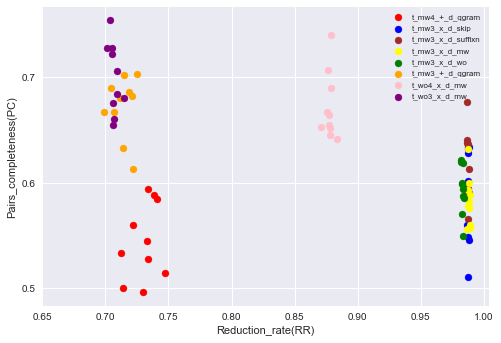

In [27]:
# in this section we vistulize the evaluation data for the Low group

# importing the required module
import matplotlib.pyplot as plt

 
# plotting the points
plt.scatter(output_low['t_mw4_d_qgram_union']['RR'],output_low['t_mw4_d_qgram_union']['PC'],c = 'red')
plt.scatter(output_low['t_mw3_d_skip_conjunction']['RR'],output_low['t_mw3_d_skip_conjunction']['PC'],c = 'blue')
plt.scatter(output_low['t_mw3_d_suffix_conjunction']['RR'],output_low['t_mw3_d_suffix_conjunction']['PC'],c = 'brown')
plt.scatter(output_low['t_mw3_d_mw_conjunction']['RR'],output_low['t_mw3_d_mw_conjunction']['PC'],c = 'yellow')
plt.scatter(output_low['t_mw3_d_wo_conjunction']['RR'],output_low['t_mw3_d_wo_conjunction']['PC'],c = 'green')
plt.scatter(output_low['t_mw3_d_qgram_union']['RR'],output_low['t_mw3_d_qgram_union']['PC'],c = 'orange')
plt.scatter(output_low['t_wo4_d_mw_conjunction']['RR'],output_low['t_wo4_d_mw_conjunction']['PC'],c = 'pink')
plt.scatter(output_low['t_wo3_d_mw_conjunction']['RR'],output_low['t_wo3_d_mw_conjunction']['PC'],c = 'purple')

# naming the x axis
plt.xlabel('Reduction_rate(RR)')
plt.xticks([0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]) 
# naming the y axis
plt.ylabel('Pairs_completeness(PC)')
plt.yticks( [0.5,0.6,0.7] ) 
plt.legend(['t_mw4_+_d_qgram', 't_mw3_x_d_skip', 't_mw3_x_d_suffixn', 't_mw3_x_d_mw', 't_mw3_x_d_wo', 't_mw3_+_d_qgram', 't_wo4_x_d_mw', 't_wo3_x_d_mw', 't_wo3_x_d_wo'],
          loc="upper right",fontsize=8)
plt.style.use("seaborn")
# giving a title to my graph
#plt.title("Figure : Scatter plots for the 'high' PC category blocking methods showing the trade-off between the reduction rate(RR) and pairs completeness (PC), where each point represents one of the 10 bootstraps.")
 
# function to show the plot
plt.savefig('low_PC_group_updated.jpg')
plt.show()



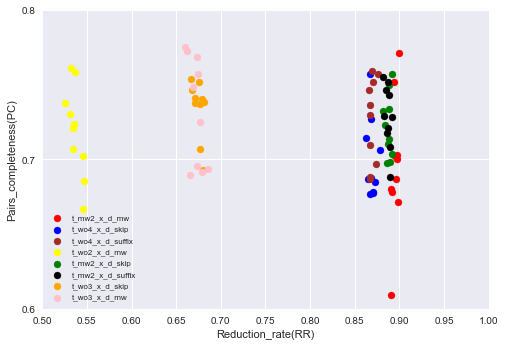

In [30]:
# in this section we vistulize the evaluation data for the Middle group

# importing the required module
import matplotlib.pyplot as plt

 
# plotting the points
plt.scatter(output_mid['t_mw2_d_mw_conjunction']['RR'],output_mid['t_mw2_d_mw_conjunction']['PC'],c = 'red')
plt.scatter(output_mid['t_wo4_d_skip_conjunction']['RR'],output_mid['t_wo4_d_skip_conjunction']['PC'],c = 'blue')
plt.scatter(output_mid['t_wo4_d_suffix_conjunction']['RR'],output_mid['t_wo4_d_suffix_conjunction']['PC'],c = 'brown')
plt.scatter(output_mid['t_wo2_d_mw_conjunction']['RR'],output_mid['t_wo2_d_mw_conjunction']['PC'],c = 'yellow')
plt.scatter(output_mid['t_mw2_d_skip_conjunction']['RR'],output_mid['t_mw2_d_skip_conjunction']['PC'],c = 'green')
plt.scatter(output_mid['t_mw2_d_suffix_conjunction']['RR'],output_mid['t_mw2_d_suffix_conjunction']['PC'],c = 'black')
plt.scatter(output_mid['t_wo3_d_skip_conjunction']['RR'],output_mid['t_wo3_d_skip_conjunction']['PC'],c = 'orange')
plt.scatter(output_mid['t_wo3_d_suffix_conjunction']['RR'],output_mid['t_wo3_d_suffix_conjunction']['PC'],c = 'pink')

# naming the x axis
plt.xlabel('Reduction_rate(RR)')
plt.xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]) 
# naming the y axis
plt.ylabel('Pairs_completeness(PC)')
plt.yticks( [0.6,0.7,0.8] ) 
plt.legend(['t_mw2_x_d_mw', 't_wo4_x_d_skip', 't_wo4_x_d_suffix', 't_wo2_x_d_mw', 't_mw2_x_d_skip', 't_mw2_x_d_suffix', 't_wo3_x_d_skip', 't_wo3_x_d_mw', 't_wo3_x_d_suffix'],
          loc="lower left",fontsize=8)
plt.style.use("seaborn")
# giving a title to my graph
#plt.title("Figure 3: Scatter plots for the 'high' PC category blocking methods showing the trade-off between the reduction rate(RR) and pairs completeness (PC), where each point represents one of the 10 bootstraps.")
 
# function to show the plot
plt.savefig('mid_PC_group_updated.jpg')
plt.show()

In [107]:
output_high.keys()

dict_keys(['t_wo4_d_wo_conjunction', 't_mw2_d_wo_conjunction', 't_wo3_d_wo_conjunction', 't_mw2_d_qgram_union', 't_wo2_d_wo_conjunction', 't_wo4_d_qgram_union', 't_wo3_d_qgram_union'])

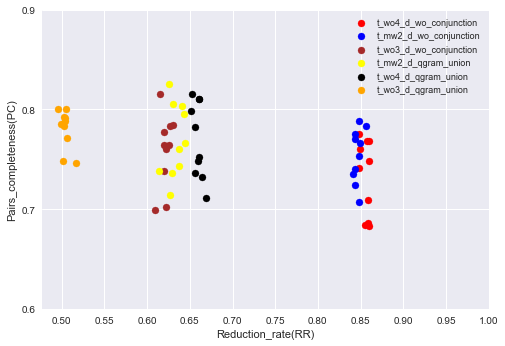

In [32]:
# in this section we vistulize the evaluation data for the High group

# importing the required module
import matplotlib.pyplot as plt

 
# plotting the points
plt.scatter(output_high['t_wo4_d_wo_conjunction']['RR'],output_high['t_wo4_d_wo_conjunction']['PC'],c = 'red')
plt.scatter(output_high['t_mw2_d_wo_conjunction']['RR'],output_high['t_mw2_d_wo_conjunction']['PC'],c = 'blue')
plt.scatter(output_high['t_wo3_d_wo_conjunction']['RR'],output_high['t_wo3_d_wo_conjunction']['PC'],c = 'brown')
plt.scatter(output_high['t_mw2_d_qgram_union']['RR'],output_high['t_mw2_d_qgram_union']['PC'],c = 'yellow')
#plt.scatter(output_high['t_wo2_d_wo_conjunction']['RR'],output_high['t_wo2_d_wo_conjunction']['PC'],c = 'green')
plt.scatter(output_high['t_wo4_d_qgram_union']['RR'],output_high['t_wo4_d_qgram_union']['PC'],c = 'black')
plt.scatter(output_high['t_wo3_d_qgram_union']['RR'],output_high['t_wo3_d_qgram_union']['PC'],c = 'orange')


# naming the x axis
plt.xlabel('Reduction_rate(RR)')
plt.xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]) 
# naming the y axis
plt.ylabel('Pairs_completeness(PC)')
plt.yticks( [0.6,0.7,0.8,0.9] ) 
plt.legend(['t_wo4_d_wo_conjunction', 't_mw2_d_wo_conjunction', 't_wo3_d_wo_conjunction', 't_mw2_d_qgram_union', 't_wo4_d_qgram_union', 't_wo3_d_qgram_union'],
          loc="upper right",fontsize=9)
plt.style.use("seaborn")
# giving a title to my graph
#plt.title("Figure 3: Scatter plots for the 'high' PC category blocking methods showing the trade-off between the reduction rate(RR) and pairs completeness (PC), where each point represents one of the 10 bootstraps.")
 
# function to show the plot
plt.savefig('high_PC_group_updated.jpg')
plt.show()

In [57]:
output_high['t_mw2_d_skip_union']

{'PQ': [0.00024255926980676113,
  0.0002375524785403314,
  0.00027335984095427435,
  0.00023139745916515427,
  0.00023567268689523896,
  0.000232762289848904,
  0.0002551054659702735,
  0.00025632998970143226,
  0.00022374868547647282,
  0.0002706341786364511],
 'PC': [0.8307692307692308,
  0.7703703703703704,
  0.7857142857142857,
  0.7391304347826086,
  0.7819548872180451,
  0.7664233576642335,
  0.7916666666666666,
  0.7687074829931972,
  0.7092198581560284,
  0.8344827586206897],
 'RR': [0.29301737716579446,
  0.3048530308419287,
  0.2971647782124892,
  0.30008637772470914,
  0.2993083430719984,
  0.2837254204562776,
  0.2904419236827397,
  0.30002604034347846,
  0.2903530054367156,
  0.29008625069864336],
 'summary': {'PQ_std': 1.618143884212168e-05,
  'PQ_mean': 0.0002459122344995293,
  'PC_std': 0.03571653827658423,
  'PC_mean': 0.7778439332955356,
  'RR_std': 0.006074020310127971,
  'RR_mean': 0.2949062547634774}}

In [35]:
import json

with open('output_low_updata.json', 'w') as u:
    json.dump(output_low, u)
    